# Build the non-transfer learning model

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [9]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Pre-processing the train and validation datasets

In [3]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = validation_datagen.flow_from_directory(
        'data/validation',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Train the model

In [5]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=int(np.ceil(1500 / batch_size)),
        epochs=37,
        validation_data=validation_generator,
        validation_steps=int(np.ceil(200 / batch_size)))

Epoch 1/37
94/94 [==============================] - 83s - loss: 0.6407 - acc: 0.6425 - val_loss: 0.5676 - val_acc: 0.7250
Epoch 2/37
94/94 [==============================] - 82s - loss: 0.5882 - acc: 0.6930 - val_loss: 0.5328 - val_acc: 0.7950
Epoch 3/37
94/94 [==============================] - 82s - loss: 0.5366 - acc: 0.7471 - val_loss: 0.4589 - val_acc: 0.8300
Epoch 4/37
94/94 [==============================] - 85s - loss: 0.5135 - acc: 0.7688 - val_loss: 0.4214 - val_acc: 0.8450
Epoch 5/37
94/94 [==============================] - 83s - loss: 0.4907 - acc: 0.7655 - val_loss: 0.4547 - val_acc: 0.7900
Epoch 6/37
94/94 [==============================] - 82s - loss: 0.4931 - acc: 0.7739 - val_loss: 0.3881 - val_acc: 0.8450
Epoch 7/37
94/94 [==============================] - 79s - loss: 0.4626 - acc: 0.7808 - val_loss: 0.4547 - val_acc: 0.8400
Epoch 8/37
94/94 [==============================] - 79s - loss: 0.4564 - acc: 0.8032 - val_loss: 0.4241 - val_acc: 0.8450
Epoch 9/37
94/94 [======

In [6]:
model.save_weights('fromscratch_weights.h5')  # always save your weights after training or during training

# Show the trainning history

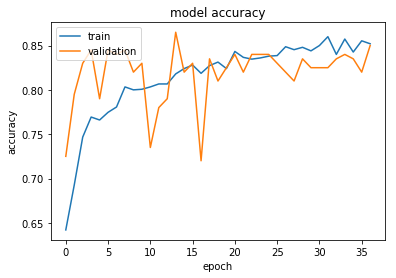

In [7]:
import matplotlib.pyplot as plt
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

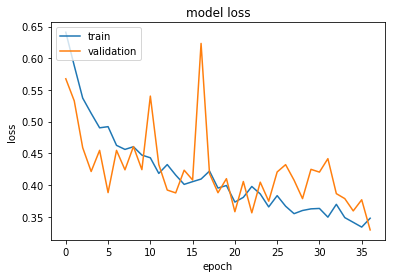

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate the model using the test dateset

In [4]:
model.load_weights('fromscratch_weights.h5')

In [6]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

Found 128 images belonging to 2 classes.


In [12]:
model.evaluate_generator(test_generator, steps=int(np.ceil(128 / batch_size)), max_queue_size=10, workers=1, use_multiprocessing=False)

[0.6813695877790451, 0.7109375]

In [22]:
model.metrics_names

['loss', 'acc']